# Parameter sweeps - Analysis

This notebook reads the output of `07_cluster_stats_sweeps.ipynb` and generates several plots as part of the analysis of results.

## Configuration

We need to define the name (or label) of the parameter sweeps experiments, as well as the path to access the results.

In [1]:
LABEL          = 'parameter_sweeps'
RESULTS_PATH   = '../results'

And we have some standard packages to read the files and analize the data.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

## Input files and observation data

Let's read all the experiment data and save it into a `results` dataframe.

In [3]:
# Locate output directory
results_dir = os.path.join( os.path.abspath(RESULTS_PATH), LABEL )
if os.path.exists( results_dir ):
    print( '... results directory found.' )
else:
    print( '... results directory not found.' )
    raise

# Identify the relevant experiment result files
output_prefix = results_dir + '/' + LABEL
output_files = [ filename for filename in os.listdir(results_dir) if filename.startswith(LABEL + '-parameter-sweep-results--experiment-') ]
print( '... ', len(output_files), ' result files found' )

# Load data into dataframe
results = pd.DataFrame()
columns_to_keep = [ 'reff', 'sampling_rate', 'cutoff', 'n_clusters',
       'cluster_size_mean', 'cluster_size_cov', 'weighted_cluster_size_mean',
       'weighted_cluster_size_cov', 'sim_time', 'mean_partner',
       'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay',
       'execution_time', 'experiment_id']
for i, file in enumerate(output_files):
    if (i%10 == 0):
        print( '... processing file ', i+1, '/', len(output_files) )
    results_this_file = pd.read_csv( results_dir + '/' + file )     \
                          .loc[:,columns_to_keep]                   \
                          .groupby( ['sampling_rate','cutoff'] )    \
                          .mean()                                   \
                          .reset_index()
    results = pd.concat( [results, results_this_file], ignore_index=True )

... results directory found.


In [50]:
results

,sampling_rate,cutoff,reff,n_clusters,cluster_size_mean,cluster_size_cov,weighted_cluster_size_mean,weighted_cluster_size_cov,sim_time,mean_partner,acts_per_day,lambda,removal_rate,sampling_delay,execution_time,experiment_id,Execution time per simulation (minutes),error_cluster_size_mean_zambia,error_cluster_size_mean_r0_zambia
0,0.04,365,1.750942,0.2,0.400000,0.000000,0.400000,0.000000,7300.0,0.5,0.2,0.0025,0.002,180.0,1472.040366,1318.0,4.906801,0.823789,1.274904
1,0.04,4015,1.750942,1.0,57.200000,0.000000,57.200000,0.000000,7300.0,0.5,0.2,0.0025,0.002,180.0,1472.040366,1318.0,4.906801,24.198238,24.649353
2,0.06,365,1.750942,1.2,1.200000,0.000000,1.200000,0.000000,7300.0,0.5,0.2,0.0025,0.002,180.0,1472.040366,1318.0,4.906801,0.471366,0.922481
3,0.06,4015,1.750942,1.0,85.400000,0.000000,85.400000,0.000000,7300.0,0.5,0.2,0.0025,0.002,180.0,1472.040366,1318.0,4.906801,36.621145,37.072261
4,0.08,365,1.750942,2.6,1.200000,0.000000,1.200000,0.000000,7300.0,0.5,0.2,0.0025,0.002,180.0,1472.040366,1318.0,4.906801,0.471366,0.922481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79179,0.96,4015,1.867933,4.6,360.533333,0.869611,723.692409,0.468288,7300.0,0.4,0.2,0.0015,0.003,360.0,1164.782464,944.0,3.882608,157.825257,158.239698
79180,0.98,365,1.867933,0.0,0.000000,0.000000,0.000000,NaN,7300.0,0.4,0.2,0.0015,0.003,360.0,1164.782464,944.0,3.882608,1.000000,1.414441
79181,0.98,4015,1.867933,4.4,370.157143,0.851373,742.284530,0.468989,7300.0,0.4,0.2,0.0015,0.003,360.0,1164.782464,944.0,3.882608,162.064821,162.479262
79182,1.00,365,1.867933,0.0,0.000000,0.000000,0.000000,NaN,7300.0,0.4,0.2,0.0015,0.003,360.0,1164.782464,944.0,3.882608,1.000000,1.414441


And here is the observation data:

In [9]:
pangea_data = pd.DataFrame( [ [ 'HIVDRD, UK'         , 'firebrick' , 3.4 , 1.5 , 11   , 2   , 0.7 , 1.5    ],
                              [ 'PopART, Zambia'     , 'blue'      , 2.27, 0.29,  2.46, 0.39, 0.16, 3.19   ],
                              [ 'Rakai, Uganda'      , 'dodgerblue', 2.33, 0.30,  2.55, 0.36, 0.23, 3.27   ],
                              [ 'Ya Tsie, Botswana'  , 'teal'      , 2.07, 0.12,  2.10, 0.14, 0.02, 5.15   ],
                              [ 'ATHENA cohort (MSM)', 'orangered' , 4.58, 1.63, 16.78,	1.46, 0.33,	np.nan ],
                              [ 'ATHENA cohort (HET)', 'red'       , 2.67, 0.72,  4.04,	0.96, 0.19, np.nan ]
                             ],
                             columns = [ 'location',
                                         'color',
                                         'cluster size (mean)',
                                         'cluster size (CoV)',
                                         'weighted cluster size (mean)',
                                         'weighted cluster size (CoV)',
                                         'Gini coefficient', 
                                         'R0'
                                        ]
                           )

## Execution time

Let's check how long it takes to finish one simulation. This is based on the execution time of the experiments that were successfully completed, i.e., experiments that timed-out are not included/counted here. 

Text(0, 0.5, 'Percent (cumulative)')

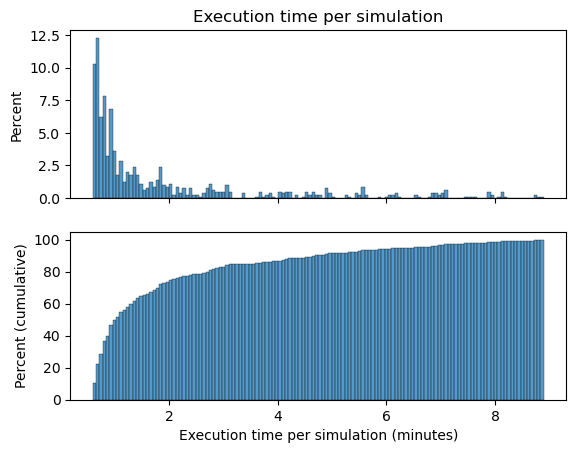

In [68]:
results['Execution time per simulation (minutes)'] = results['execution_time']/5/60

fig_time, axs_time = plt.subplots( 2, 1, sharex=True )

seaborn.histplot( results, 
                  x    = 'Execution time per simulation (minutes)', 
                  stat = 'percent',
                  ax   = axs_time[0],
                  cumulative = False,
                 )
axs_time[0].set_title( 'Execution time per simulation' )
seaborn.histplot( results, 
                  x    = 'Execution time per simulation (minutes)', 
                  stat = 'percent',
                  ax   = axs_time[1],
                  cumulative = True 
                 )
axs_time[1].set_ylabel( 'Percent (cumulative)' )

Now let's see how the execution time changes as a function of the simulation parameters

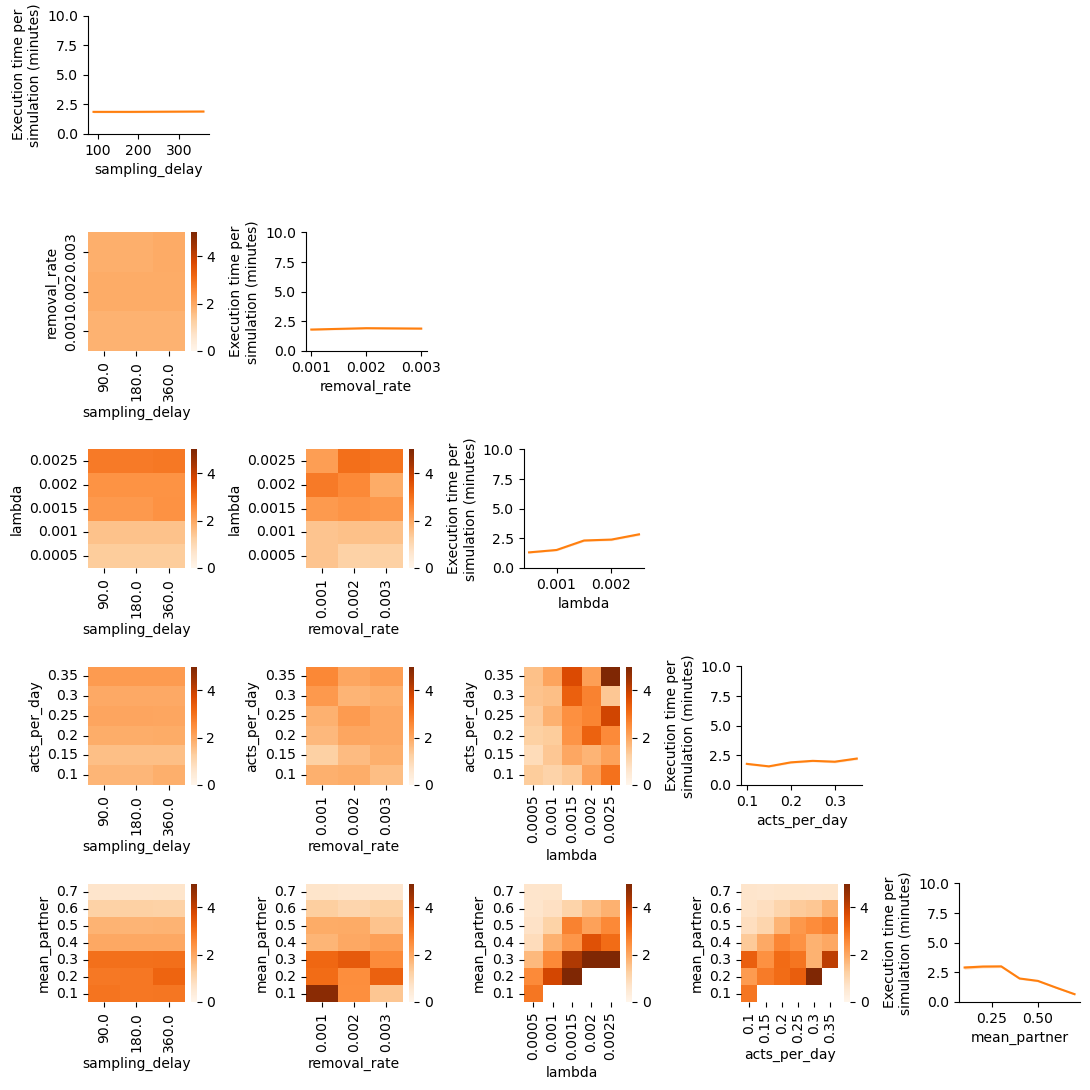

In [8]:
params = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay' ]
n = len(params)

fig_time_vs_params, axs_time_vs_params = plt.subplots( n, n, figsize=(11,11) )#, sharex=True, sharey=True )

# Nothing to do in these axes
for i in range(n):
    for j in range(i+1,n):
        import matplotlib.ticker as ticker
        seaborn.despine( ax=axs_time_vs_params[i,j], left=True, bottom=True )
        axs_time_vs_params[i,j].xaxis.set_major_locator(ticker.NullLocator())
        axs_time_vs_params[i,j].yaxis.set_major_locator(ticker.NullLocator())

# param vs time
for i, param_name in enumerate(params):
    seaborn.lineplot( results, x=param_name, y='Execution time per simulation (minutes)', ax=axs_time_vs_params[n-i-1,n-i-1], c='tab:orange' )
    seaborn.despine( ax=axs_time_vs_params[n-i-1,n-i-1] )
    axs_time_vs_params[n-i-1,n-i-1].set_ylabel( 'Execution time per\nsimulation (minutes)' )
    axs_time_vs_params[n-i-1,n-i-1].set_ylim([0,10])

# Pair plots
for i in range(n):
    for j in range(i+1,n):
        
        pairs = results[ [params[i], params[j], 'Execution time per simulation (minutes)'] ]    \
                    .groupby( [params[i], params[j]] ).mean().reset_index()
        seaborn.heatmap( pairs.pivot( index=params[i],
                                      columns = params[j],
                                      values = 'Execution time per simulation (minutes)'
                                     ),
                         vmin = 0,
                         vmax = 5,
                         cmap = 'Oranges',
                         ax   = axs_time_vs_params[n-i-1,n-j-1]
                       )
        axs_time_vs_params[n-i-1,n-j-1].invert_yaxis()
fig_time_vs_params.tight_layout()

## Clustering metrics

Can we identify the region of the parametric space that explains the observation data? Let's select a location of interest and see what combinations of parameters explain what we see there.

Let's start by defining a location, as well as a few plot functions.

In [69]:
location = 'PopART, Zambia'

In [156]:
def plot_params_vs_sampling_rate( results, 
                                  observation_data, 
                                  params, 
                                  cutoffs, 
                                  location, 
                                  metric_results,
                                  metric_observations
                                 ):
    ''' Plot cluster size for all parameters as a function of sampling rate '''
    
    # Initialization
    n = len(params)
    ticks_to_plot = observation_data[metric_observations].unique()
    center = observation_data[ observation_data['location']==location ][metric_observations].values
    half_range = max( center - observation_data[metric_observations].min(),
                      observation_data[metric_observations].max() - center )
    cbar_min = np.maximum( 0, np.floor( center - half_range ) )
    cbar_max = np.ceil ( center + half_range )
    
    # Draw plots
    fig, axs = plt.subplots( len(cutoffs), n, figsize=(20,5*len(cutoffs)) )

    for j, param_name in enumerate(params):
        data = results.groupby( [param_name, 'cutoff', 'sampling_rate'] ).mean().reset_index()
        show_colorbar = True if j==(len(params)-1) else False

        for i in range(len(cutoffs)):
            data_cutoff = data[ data['cutoff']==cutoffs[i] ] 
            seaborn.heatmap( data_cutoff.pivot( index   = param_name,
                                                columns = 'sampling_rate',
                                                values  = metric_results
                                               ),
                             vmin     = cbar_min,
                             vmax     = cbar_max,
                             center   = center,
                             cmap     = 'seismic',
                             cbar_kws = { 'ticks': ticks_to_plot,
                                          'label': metric_observations },
                             cbar     = show_colorbar,
                             ax       = axs[i,j]
                           )
            axs[i,j].invert_yaxis()

    for i in range(len(cutoffs)):
        axs[i, int(len(params)/2)].set_title( metric_observations + ';  cutoff = ' + str(cutoffs[i]) )

    # Finalize and return
    fig.tight_layout( h_pad=6 )
    return fig, axs

In [157]:
def params_pairplots( results, 
                      observation_data, 
                      params, 
                      cutoff, 
                      location, 
                      metric_results,
                      metric_observations
                     ):
    ''' Pair plots '''

    # Initialization
    n = len(params)    
    ticks_to_plot = observation_data[metric_observations].unique()
    center = observation_data[ observation_data['location']==location ][metric_observations].values
    half_range = max( center - observation_data[metric_observations].min(),
                      observation_data[metric_observations].max() - center )
    cbar_min = np.maximum( 0, np.floor( center - half_range ) )
    cbar_max = np.ceil ( center + half_range )

    # Draw the plots
    fig, axs = plt.subplots( n, n, figsize=(3*n,2.5*n) )
    #fig, axs = plt.subplots( n, n, figsize=(18,14) )

    # Nothing to do in these axes
    for i in range(n):
        for j in range(i+1,n):
            import matplotlib.ticker as ticker
            seaborn.despine( ax=axs[i,j], left=True, bottom=True )
            axs[i,j].xaxis.set_major_locator(ticker.NullLocator())
            axs[i,j].yaxis.set_major_locator(ticker.NullLocator())

    # param vs value
    for i, param_name in enumerate(params):
        seaborn.lineplot( results[results['cutoff']==cutoff], 
                          x  = param_name, 
                          y  = metric_results, 
                          ax = axs[n-i-1,n-i-1], 
                          c  = 'tab:brown' 
                         )
        seaborn.despine( ax=axs[n-i-1,n-i-1] )

    # Pair plots
    for i in range(n):
        for j in range(i+1,n):
            show_colorbar = True if j==(i+1) else False

            pairs = results[results['cutoff']==cutoff][ [params[i], params[j], metric_results] ]    \
                        .groupby( [params[i], params[j]] )    \
                        .mean()                               \
                        .reset_index()
            seaborn.heatmap( pairs.pivot( index   = params[i],
                                          columns = params[j],
                                          values  = metric_results
                                         ),
                             vmin     = cbar_min,
                             vmax     = cbar_max,
                             center   = center,
                             cmap     = 'seismic',
                             cbar_kws = { 'ticks': ticks_to_plot,
                                          'label': metric_observations },
                             cbar     = show_colorbar,
                             ax       = axs[n-i-1,n-j-1]
                           )
            axs[n-i-1,n-j-1].invert_yaxis()

    # Finalize and return
    axs[0, n-1].set_title( 'cutoff = ' + str(cutoff) )
    fig.tight_layout()
    return fig, axs

And now, let's check how the experiment data compares to observation data in the location of interest. 

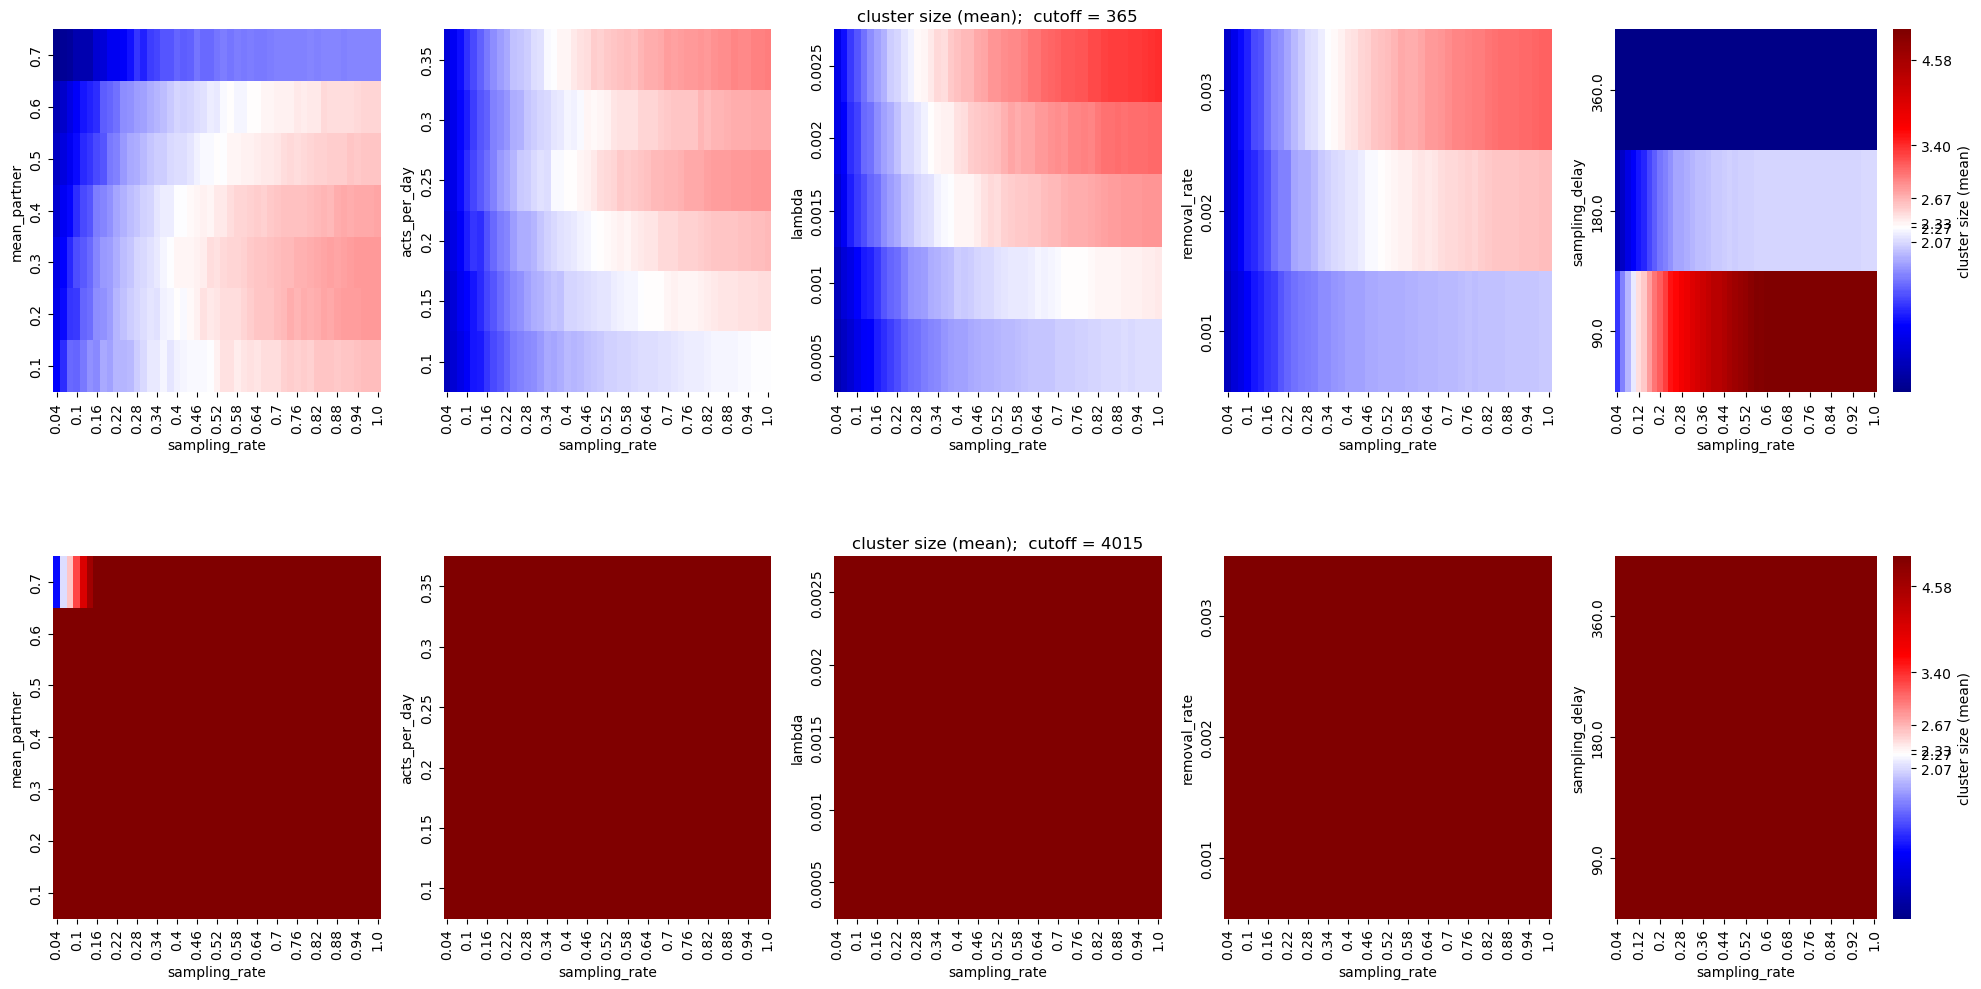

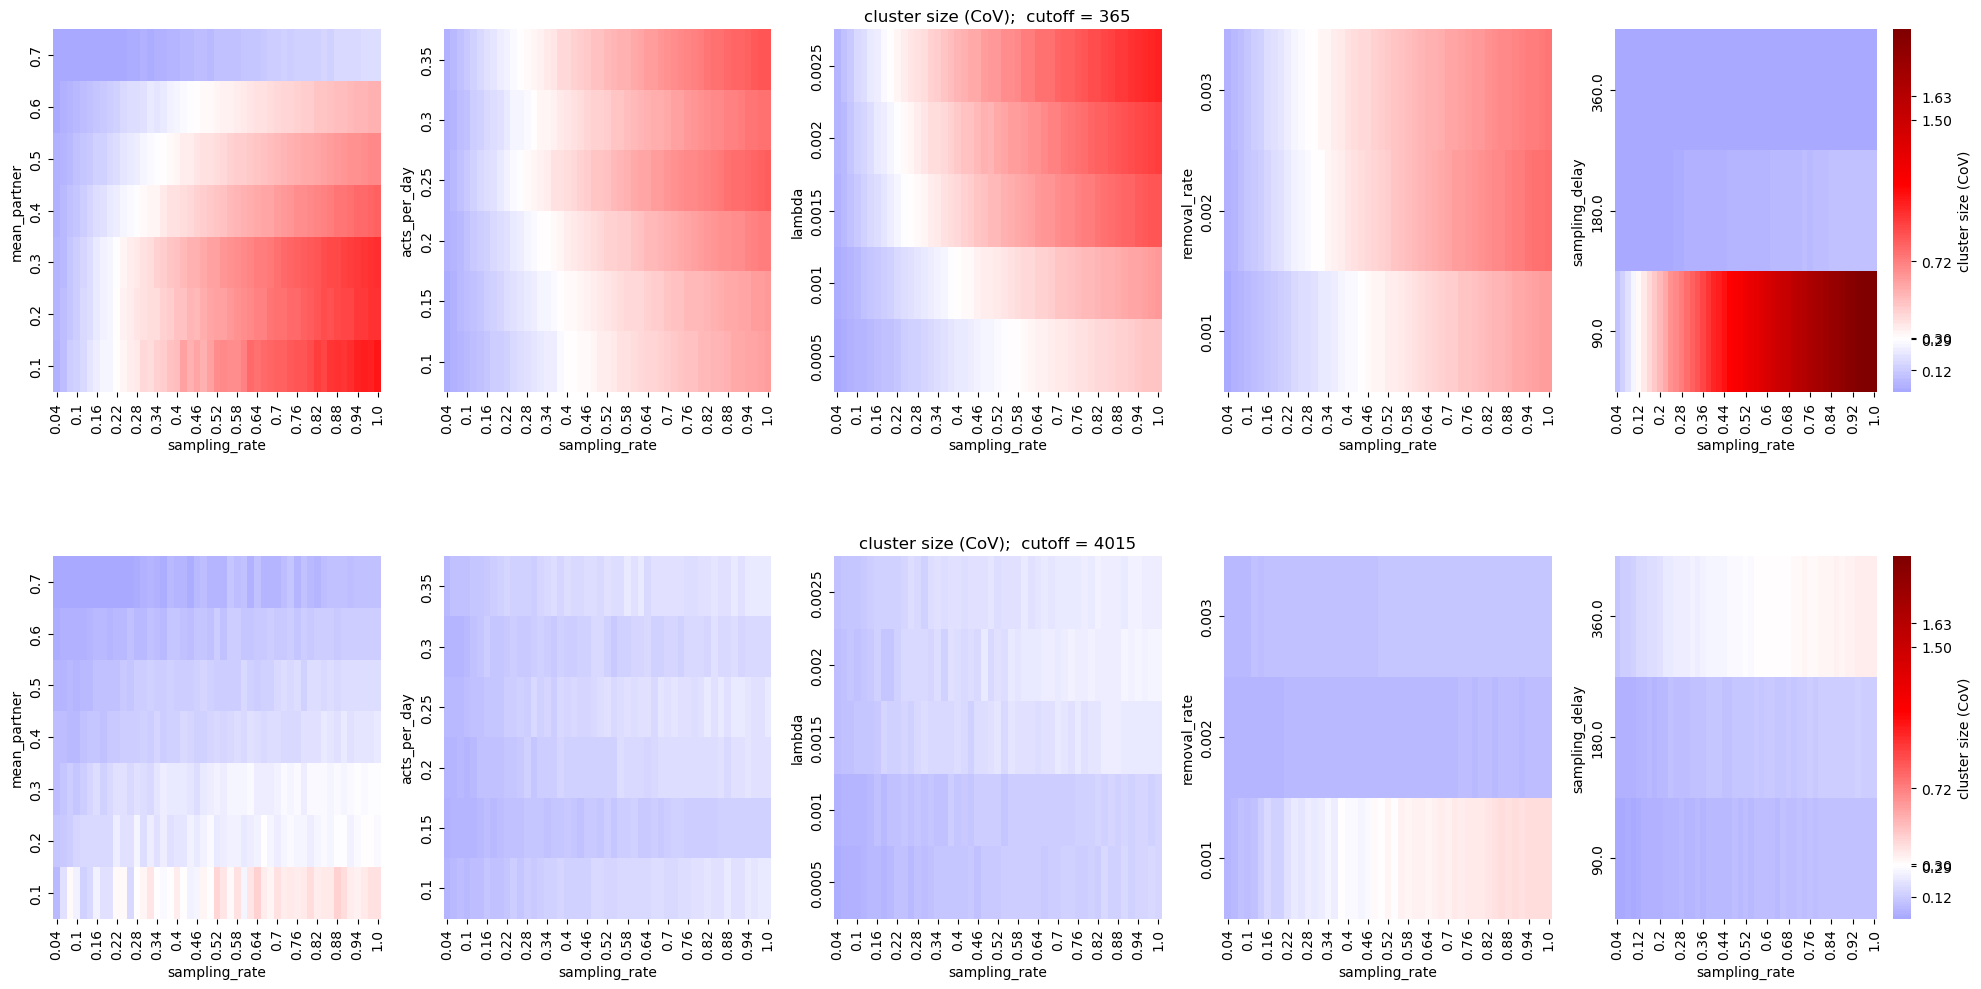

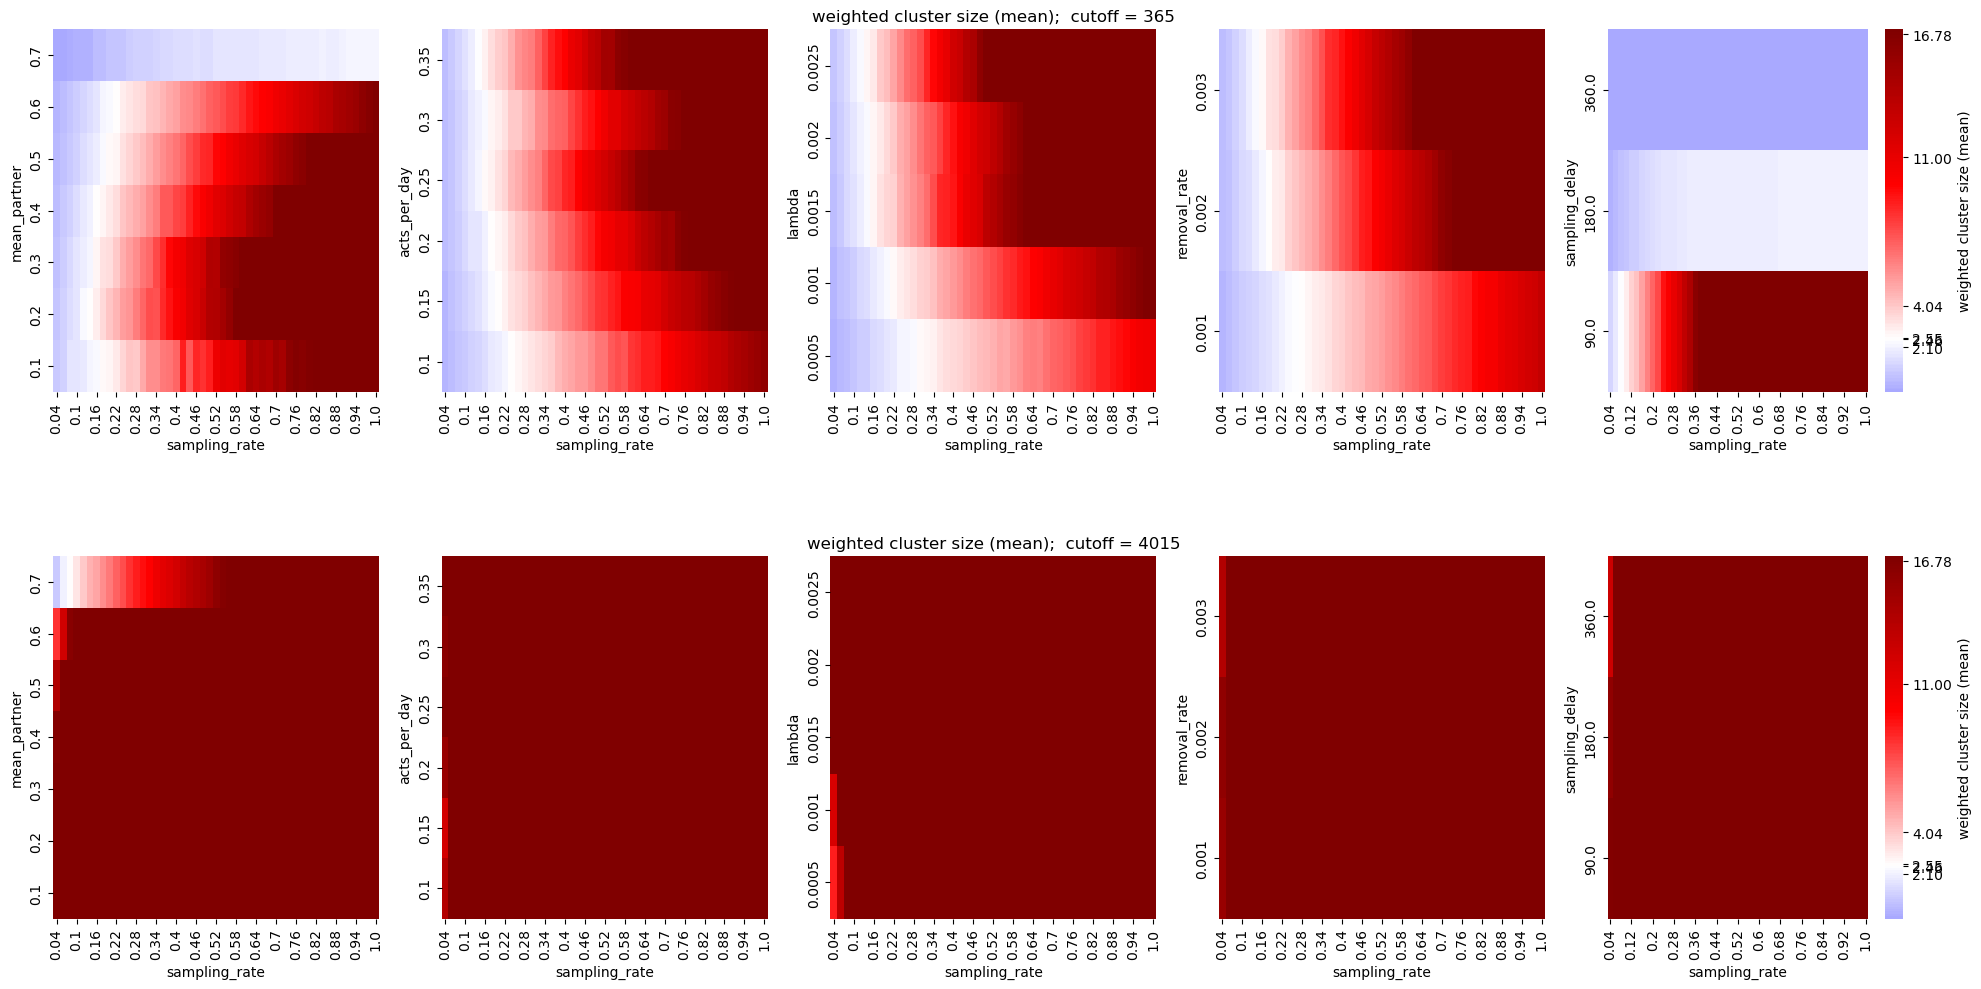

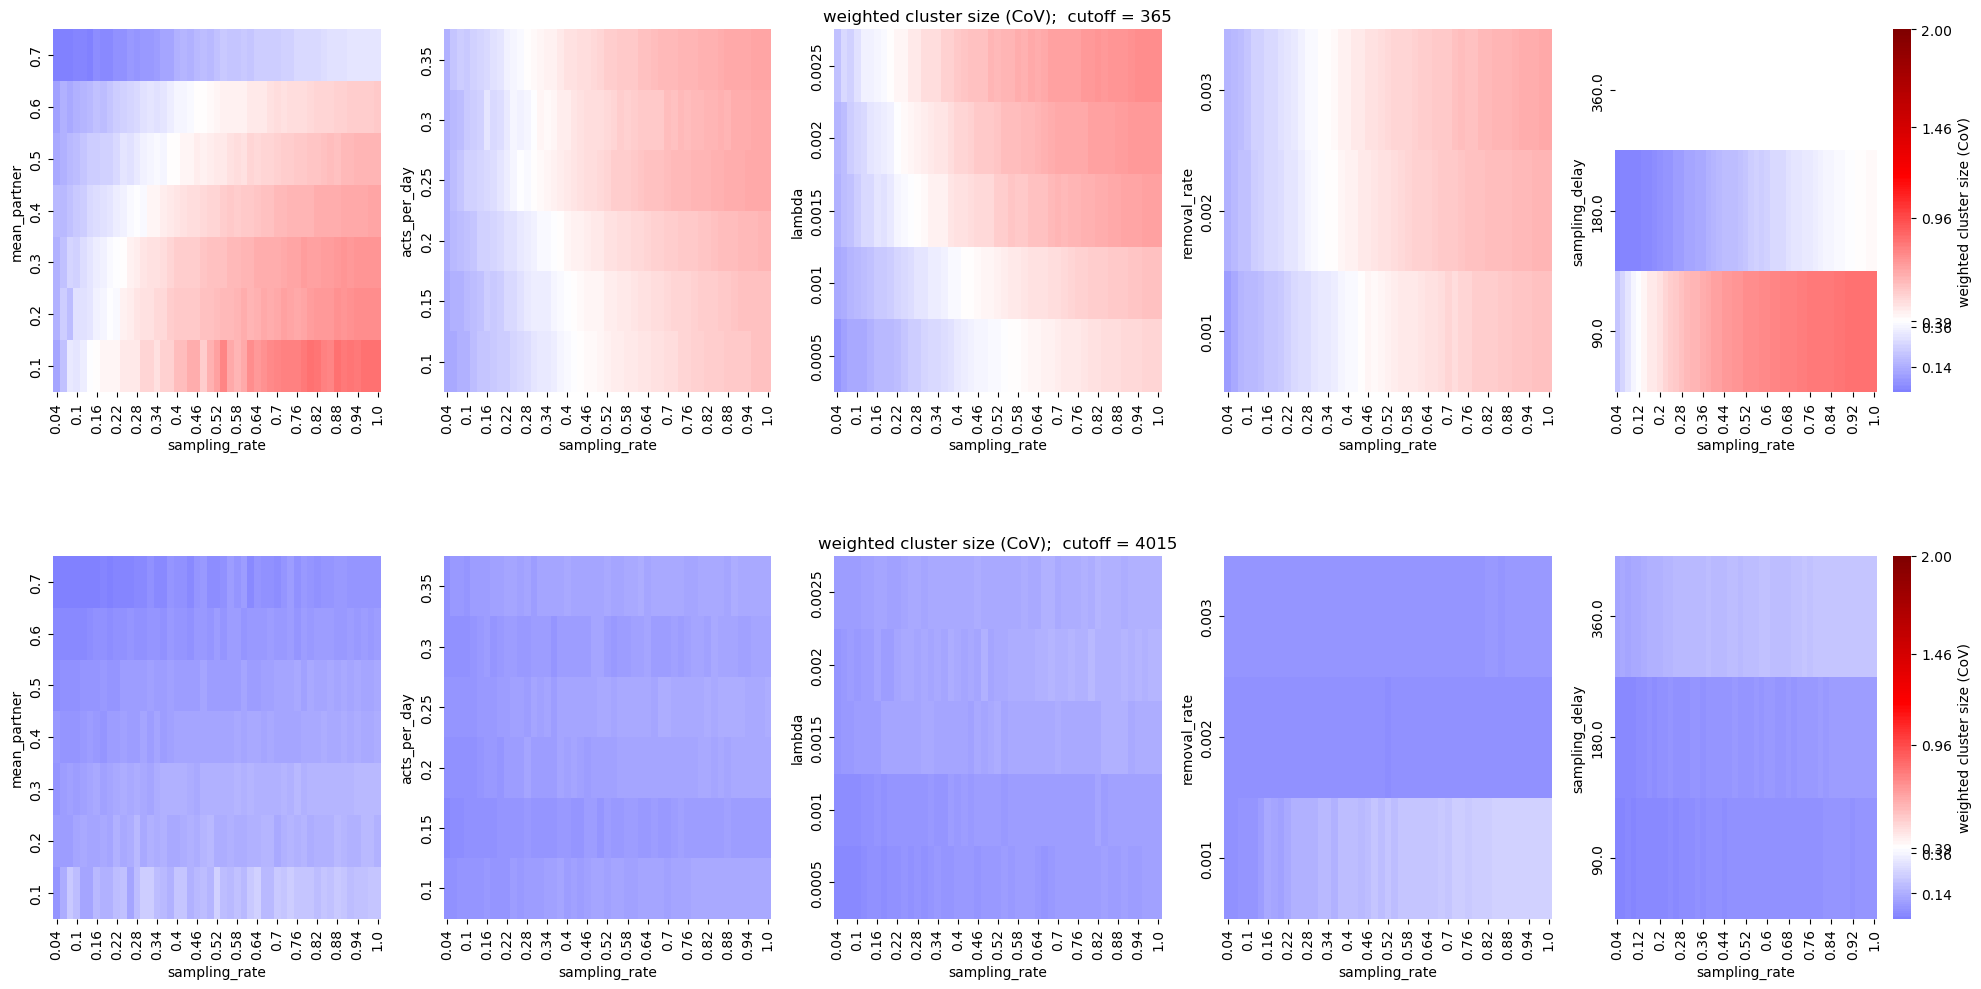

In [158]:
_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'cluster_size_mean',
                                     metric_observations = 'cluster size (mean)'
                                    )

_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'cluster_size_cov',
                                     metric_observations = 'cluster size (CoV)'
                                    )

_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'weighted_cluster_size_mean',
                                     metric_observations = 'weighted cluster size (mean)'
                                    )

_ ,_ = plot_params_vs_sampling_rate( results, 
                                     pangea_data,
                                     params   = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay'],
                                     cutoffs  = [365, 4015],
                                     location = location,
                                     metric_results = 'weighted_cluster_size_cov',
                                     metric_observations = 'weighted cluster size (CoV)'
                                    )

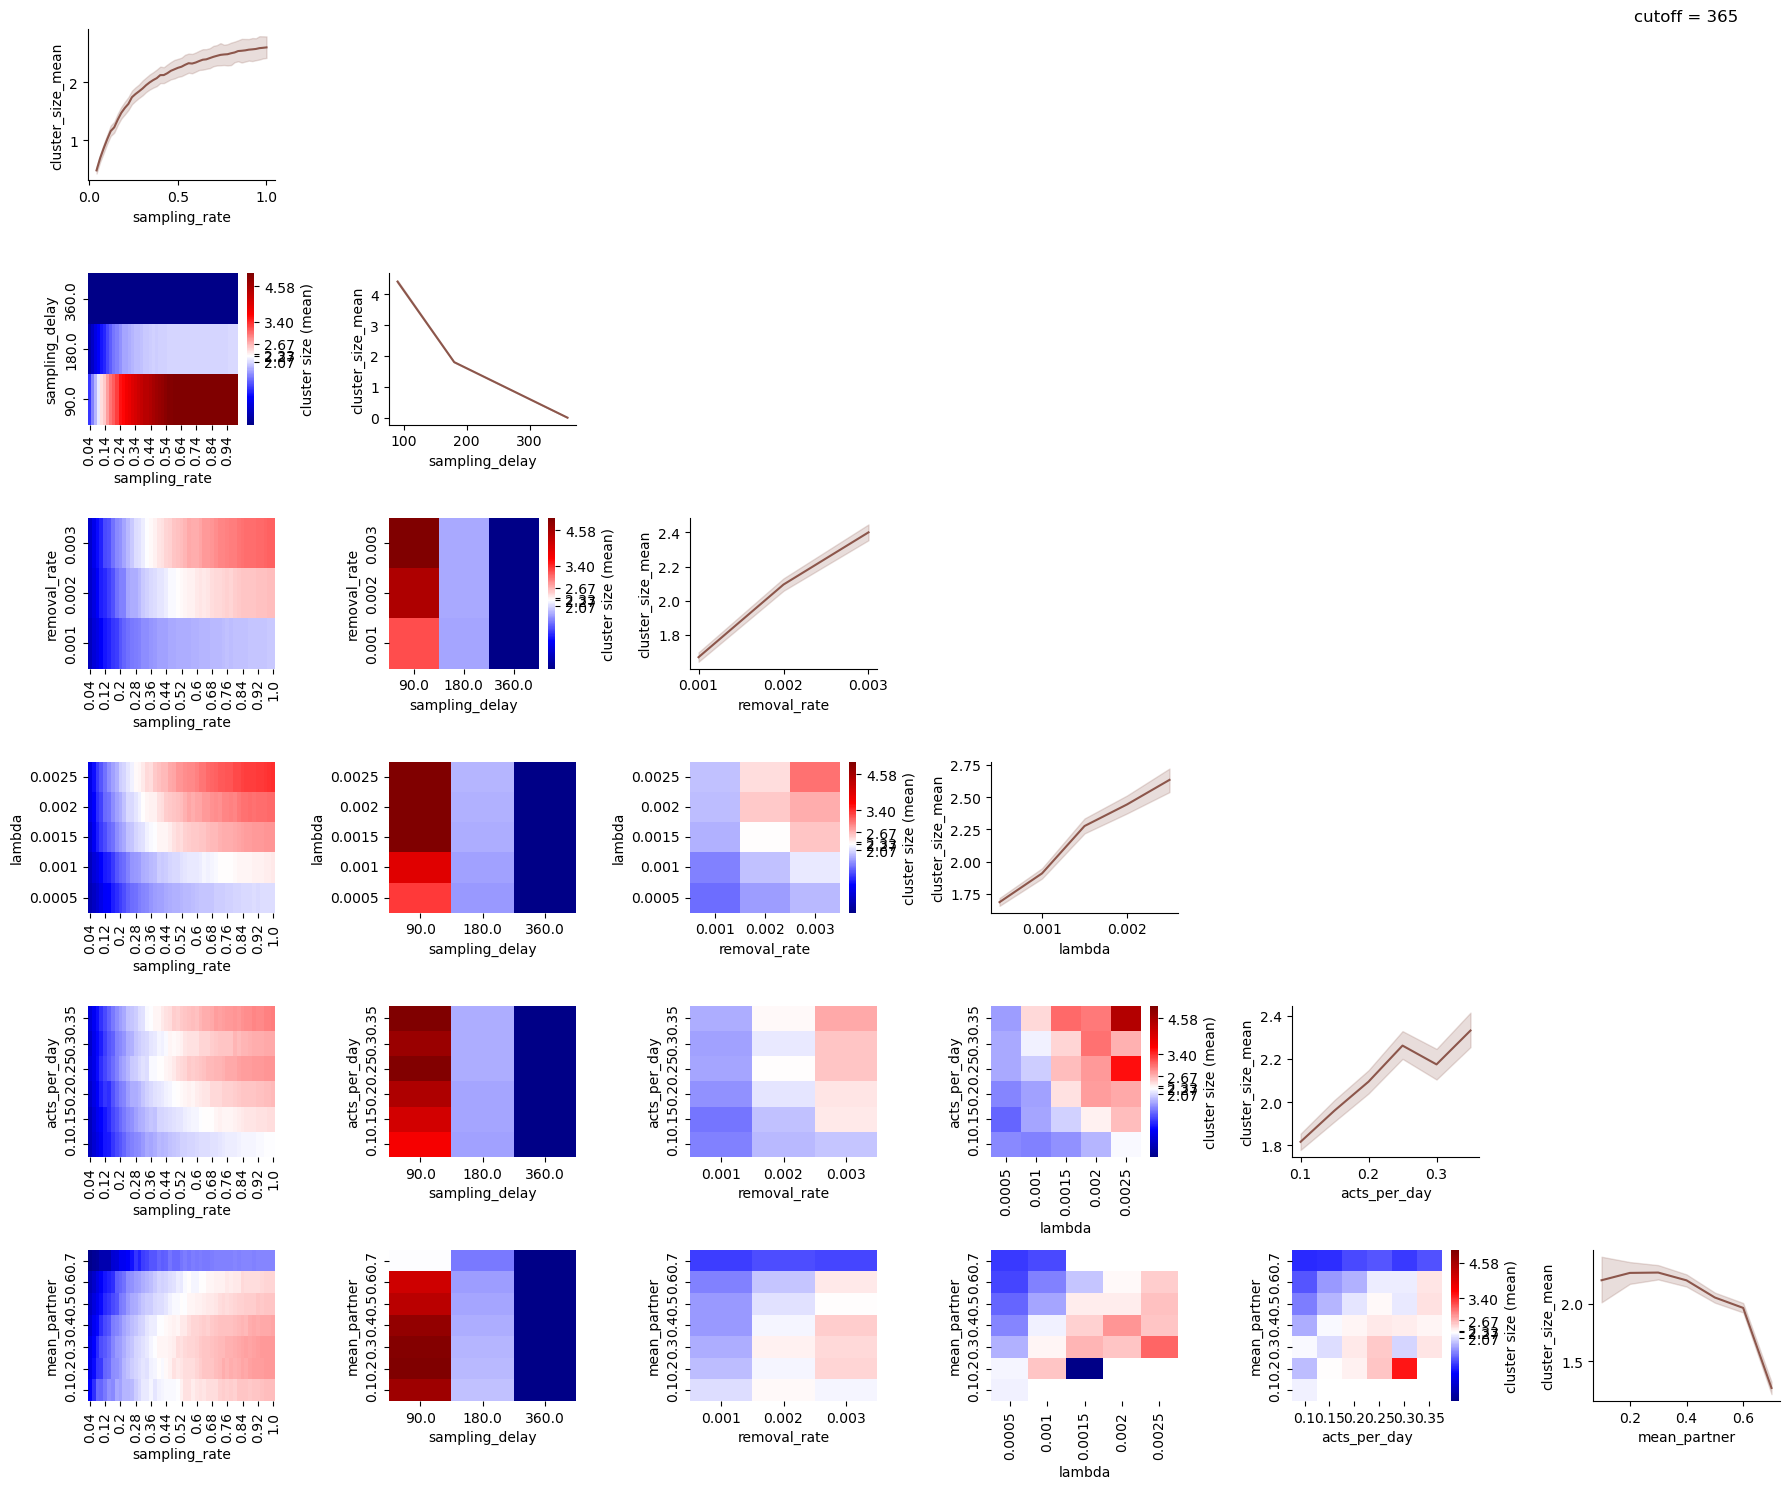

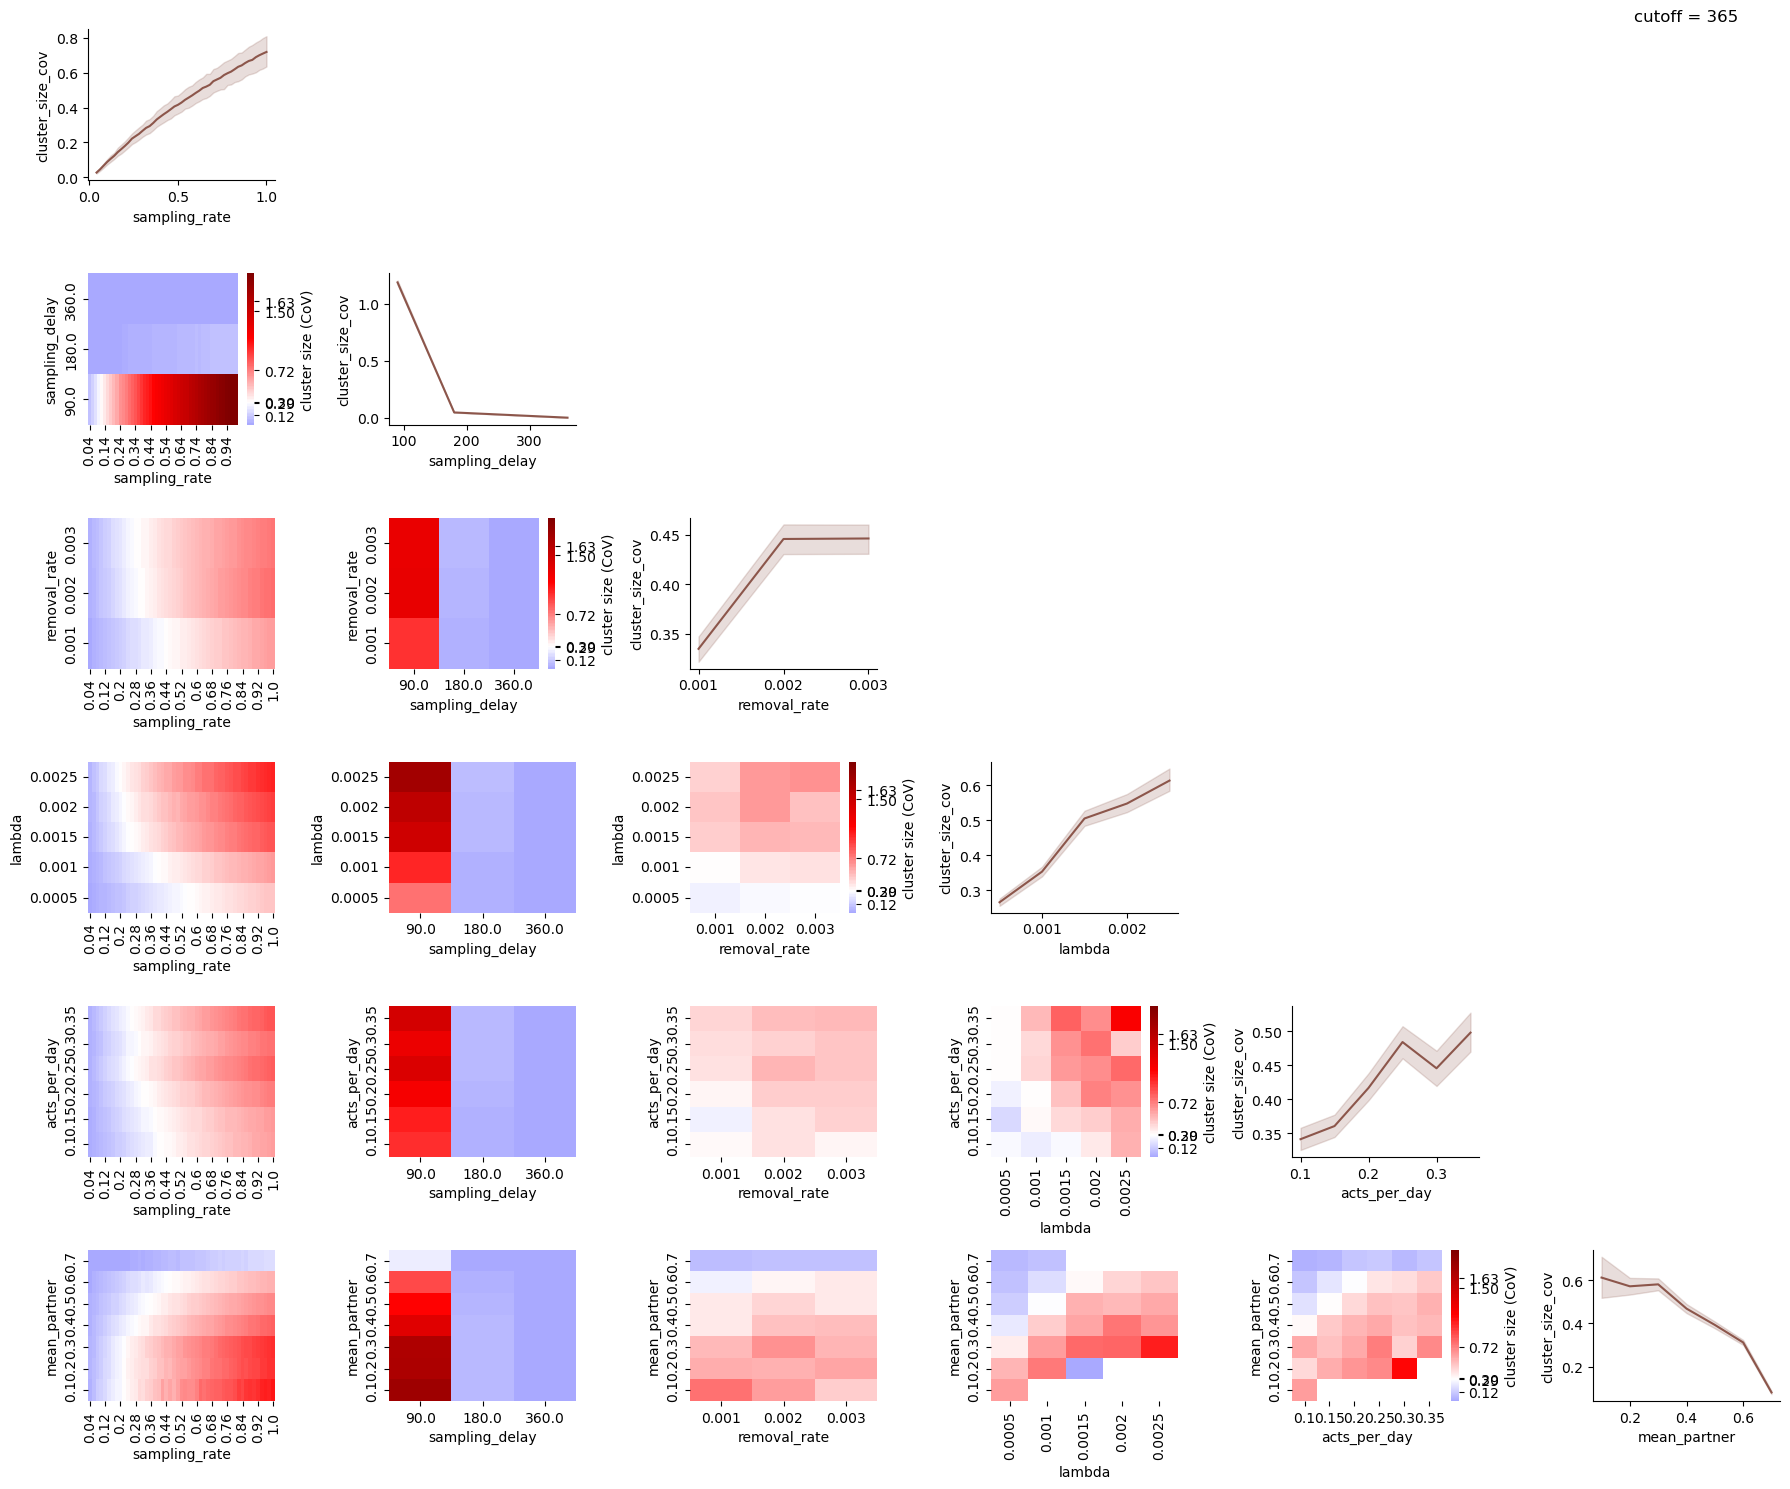

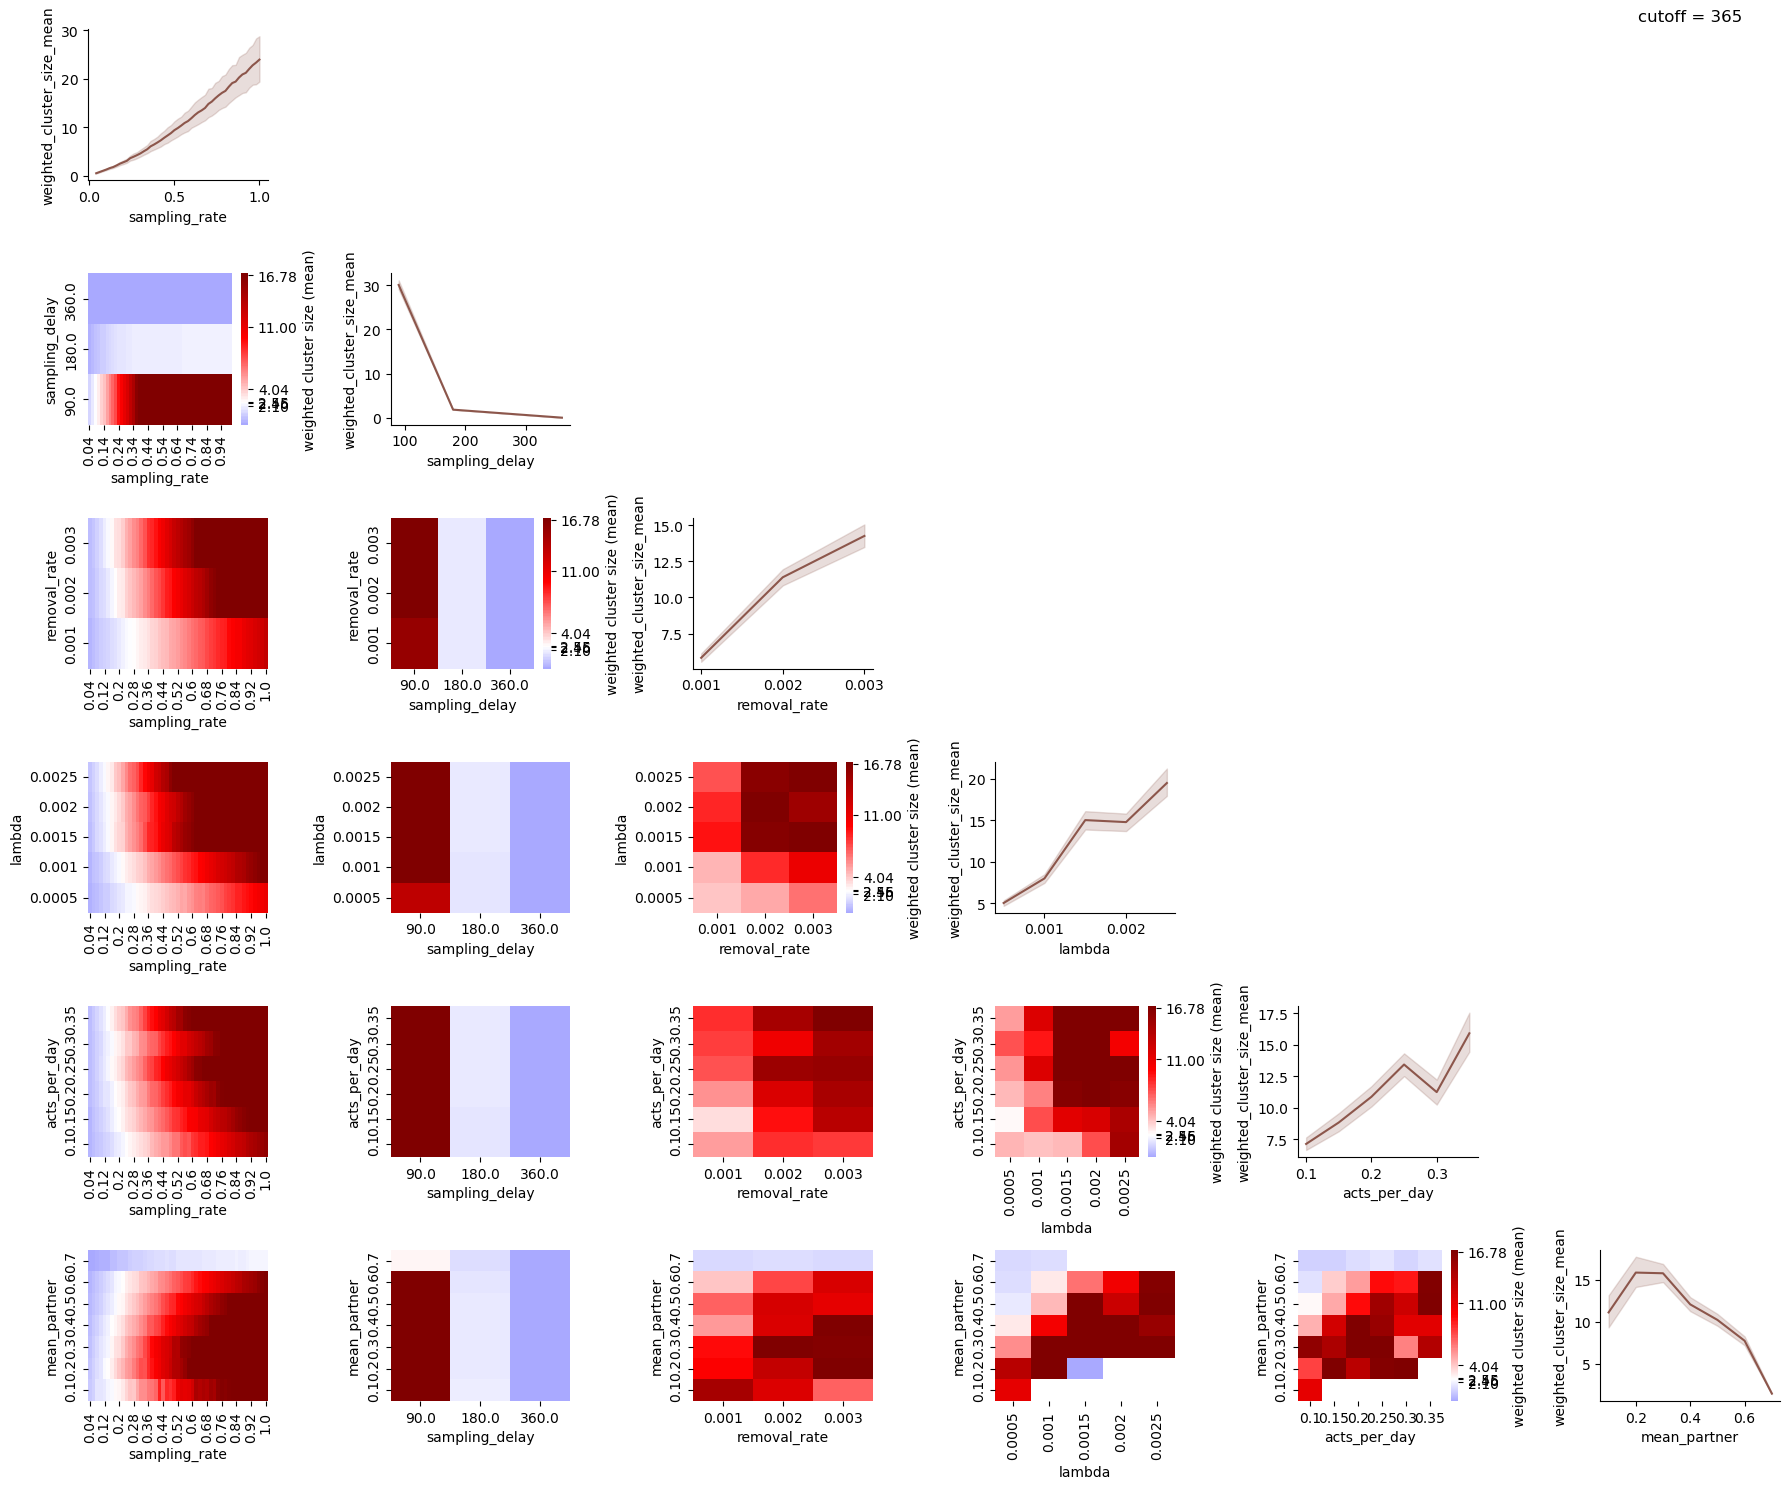

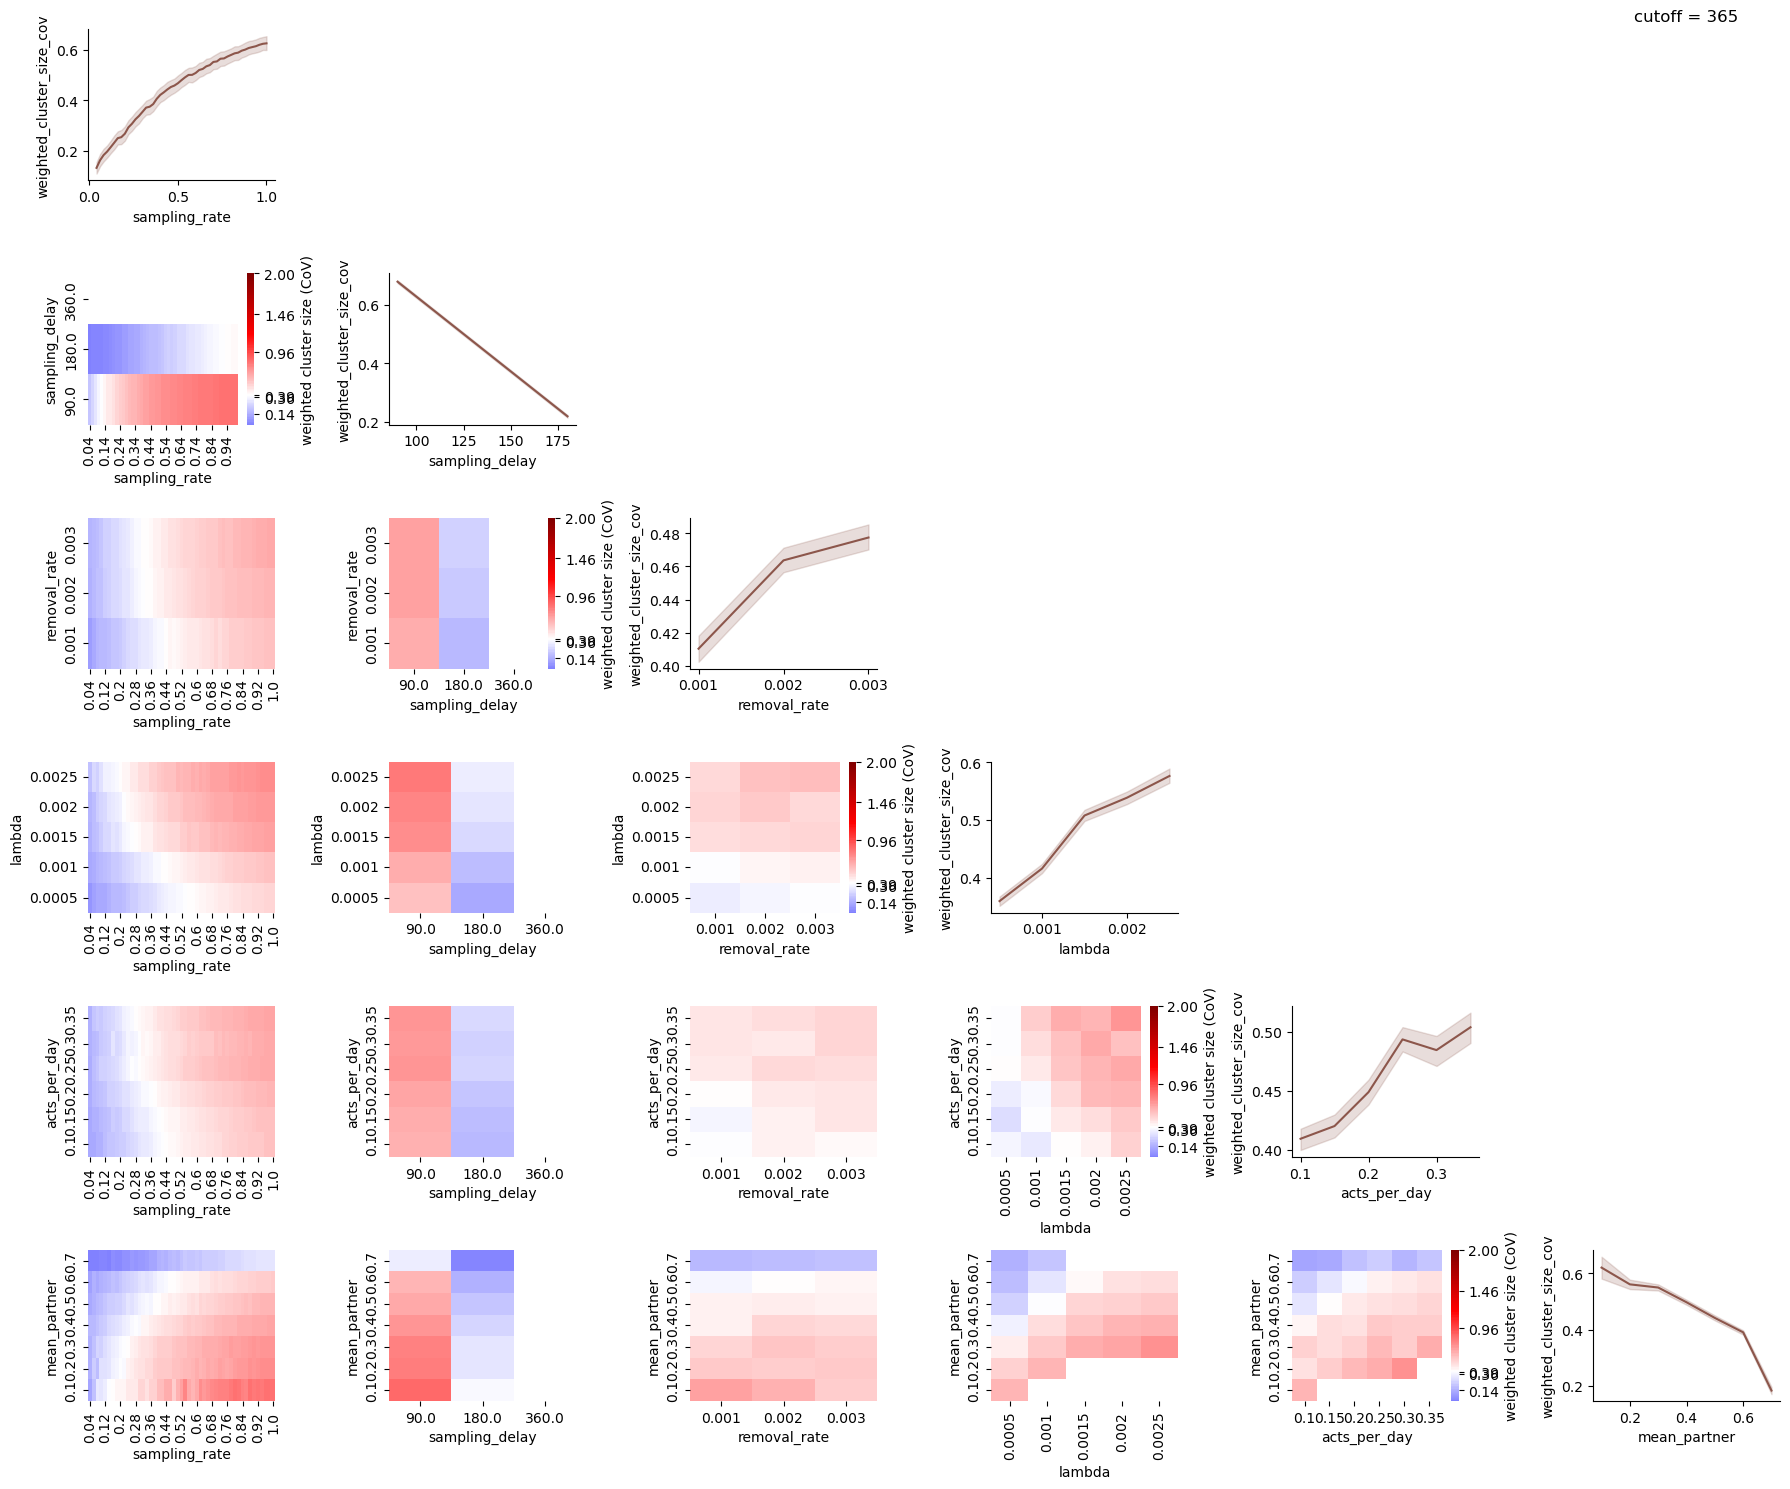

In [159]:
_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'cluster_size_mean',
                         metric_observations = 'cluster size (mean)'
                       )

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'cluster_size_cov',
                         metric_observations = 'cluster size (CoV)'
                       )

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'weighted_cluster_size_mean',
                         metric_observations = 'weighted cluster size (mean)'
                       )

_, _ = params_pairplots( results, 
                         pangea_data, 
                         params = ['mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay', 'sampling_rate'], 
                         cutoff = 365, 
                         location = location, 
                         metric_results = 'weighted_cluster_size_cov',
                         metric_observations = 'weighted cluster size (CoV)'
                       )

## Characterizing the relevant portions of the parametric space

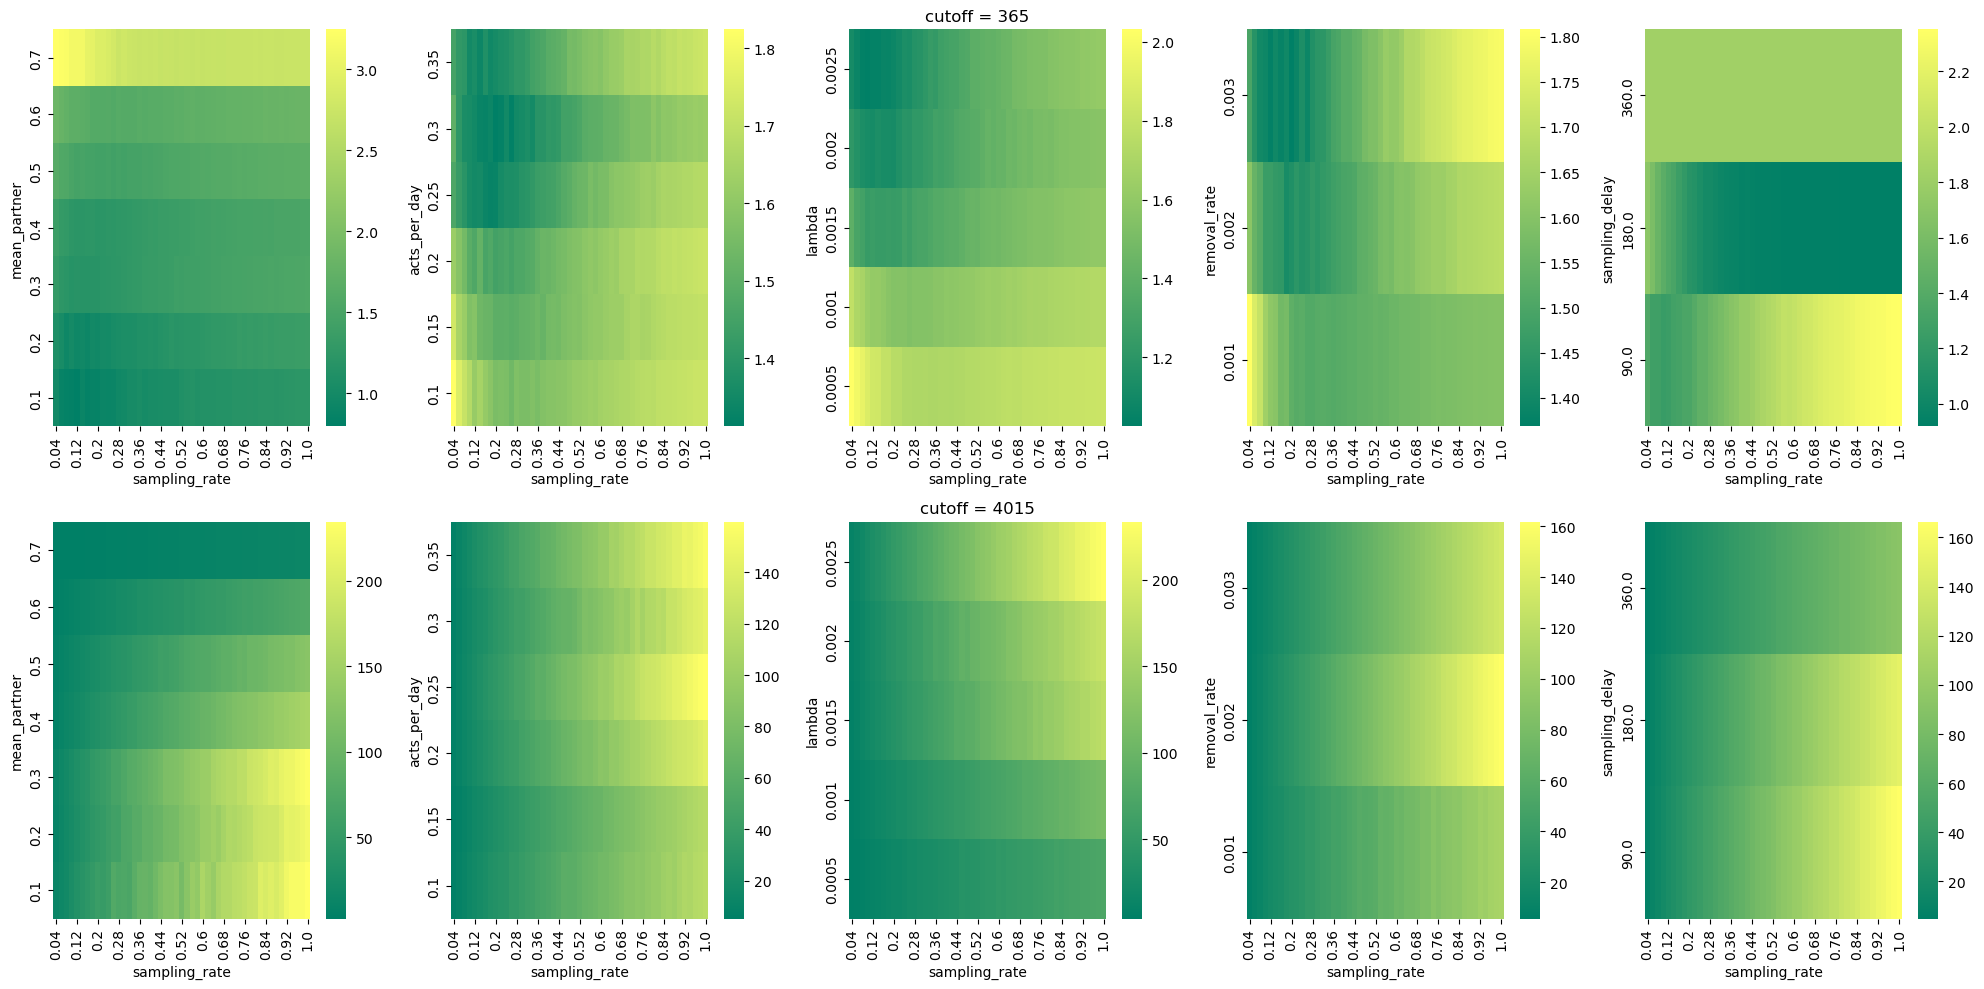

In [10]:
params = [ 'mean_partner', 'acts_per_day', 'lambda', 'removal_rate', 'sampling_delay']
n = len(params)

results['error_cluster_size_mean_zambia'] = abs( results['cluster_size_mean']  \
                                                - pangea_data[pangea_data['location']=='PopART, Zambia']['cluster size (mean)'].values[0] )  \
                                             / pangea_data[pangea_data['location']=='PopART, Zambia']['cluster size (mean)'].values[0]

results['error_cluster_size_mean_r0_zambia'] = abs( results['cluster_size_mean']  \
                                                - pangea_data[pangea_data['location']=='PopART, Zambia']['cluster size (mean)'].values[0] )  \
                                               / pangea_data[pangea_data['location']=='PopART, Zambia']['cluster size (mean)'].values[0]  \
                                              +abs( results['reff'] \
                                                - pangea_data[pangea_data['location']=='PopART, Zambia']['R0'].values[0] )  \
                                                / pangea_data[pangea_data['location']=='PopART, Zambia']['R0'].values[0]


fig_e_zambia, axs_e_zambia = plt.subplots( len(cutoffs), n, figsize=(20,10) )

for j, param_name in enumerate(params):
    data = results.groupby( [param_name, 'cutoff', 'sampling_rate'] ).mean().reset_index()
    for i in range(len(cutoffs)):
        data_cutoff = data[ data['cutoff']==cutoffs[i] ] 
        seaborn.heatmap( data_cutoff.pivot( index   = param_name,
                                            columns = 'sampling_rate',
                                            values  = 'error_cluster_size_mean_r0_zambia'
                                           ),
                             #vmin = 0,
                             #vmax = 5,
                             cmap = 'summer',
                             ax   = axs_e_zambia[i,j]
                           )
        axs_e_zambia[i,j].invert_yaxis()

for i in range(len(cutoffs)):
    axs_e_zambia[i, int(len(params)/2)].set_title( 'cutoff = ' + str(cutoffs[i]) )

fig_e_zambia.tight_layout()


In [66]:
import plotly.express as px
#import plotly.offline as pyo
#pyo.init_notebook_mode()
import plotly.io as pio
pio.renderers.default = 'iframe'

df = results
fig = px.parallel_coordinates( results[ results['cutoff']==4015], 
                               color = "error_cluster_size_mean_r0_zambia", 
                               dimensions = [ 'sampling_rate', 
                                              'removal_rate',
                                              'sampling_delay',
                                              'acts_per_day',
                                              'lambda',
                                              'mean_partner',
                                              'error_cluster_size_mean_r0_zambia'
                                             ],
                               color_continuous_scale = px.colors.sequential.BuGn_r,
                               range_color=[0,100],
                              color_continuous_midpoint=10
                              )
fig.show()